In [273]:
import gspread
import pandas as pd 
from oauth2client.service_account import ServiceAccountCredentials
import numpy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

credentials = {
}

scope = ["https://spreadsheets.google.com/feeds",'https://www.googleapis.com/auth/spreadsheets',"https://www.googleapis.com/auth/drive.file","https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_dict(credentials, scope)
client = gspread.authorize(creds)

In [274]:
sheet = client.open("IoT Cloud")

home_sheet = sheet.worksheet("Home")
print(home_sheet.row_values(1))
door_sheet = sheet.worksheet("Door")
weather_sheet = sheet.worksheet("Weather")

['2021', '12', '11', '18', '14', '1', '1639246465']


In [248]:
# test = home_sheet.get_all_records()
# print(test)

In [284]:
home = pd.DataFrame(home_sheet.get_all_values())
home.columns = ["Year", "Month", "Day", "Hour", "Minute", "Home State", "Timestamp"]
home = home.sort_values(by='Timestamp')
home.info()
home.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5694 entries, 5693 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5694 non-null   object
 1   Month       5694 non-null   object
 2   Day         5694 non-null   object
 3   Hour        5694 non-null   object
 4   Minute      5694 non-null   object
 5   Home State  5694 non-null   object
 6   Timestamp   5694 non-null   object
dtypes: object(7)
memory usage: 355.9+ KB


,Year,Month,Day,Hour,Minute,Home State,Timestamp
5693,2021,12,7,0,1,1,1638835313
5692,2021,12,7,0,2,1,1638835378
5691,2021,12,7,0,4,0,1638835446
5690,2021,12,7,0,5,1,1638835515
5689,2021,12,7,0,6,0,1638835581
5688,2021,12,7,0,7,1,1638835645
5687,2021,12,7,0,8,1,1638835710
5686,2021,12,7,0,9,1,1638835777
5685,2021,12,7,0,10,0,1638835843
5684,2021,12,7,0,11,0,1638835910


In [288]:
import time
import numpy as np

home = pd.DataFrame(home_sheet.get_all_values())
home.columns = ["Year", "Month", "Day", "Hour", "Minute", "Home State", "Timestamp"]
home = home.sort_values(by='Timestamp')

print(' start ', time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(home['Timestamp'].iloc[0]))))

time_index = pd.date_range('2021-12-07 00:01:53', periods=len(home),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
home = home.set_index(time_index)
home = home.drop(['Timestamp'], axis=1)
home.iloc[np.r_[0:5,-5:0]].iloc[:,0]

 start  2021-12-07 00:01:53


2021-12-07 00:01:53    2021
2021-12-07 00:02:53    2021
2021-12-07 00:03:53    2021
2021-12-07 00:04:53    2021
2021-12-07 00:05:53    2021
2021-12-10 22:56:53    2021
2021-12-10 22:57:53    2021
2021-12-10 22:58:53    2021
2021-12-10 22:59:53    2021
2021-12-10 23:00:53    2021
Name: Year, dtype: object

In [446]:
import time
import numpy as np

home = pd.DataFrame(home_sheet.get_all_values())
home.columns = ["Year", "Month", "Day", "Hour", "Minute", "Home State", "Timestamp"]
home = home.sort_values(by='Timestamp')

print(' start ', time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(home['Timestamp'].iloc[0]))))

home['Timestamp'] = pd.to_datetime(home['Timestamp'], unit ='s') # convert column to datetime object
home['Timestamp'] = home['Timestamp'].dt.floor('min')
home = home.set_index(home['Timestamp'])
home = home.drop(columns=["Timestamp"])

# time_index = pd.date_range('2021-12-07 00:01:53', periods=len(home),  freq='min')  
# time_index = pd.DatetimeIndex(time_index)
# home = home.set_index(time_index)
# home = home.drop(['Timestamp'], axis=1)
# home.iloc[np.r_[0:5,-5:0]].iloc[:,0]

 start  2021-12-07 00:01:53


In [334]:
home = home.drop(columns=["Year", "Month", "Day", "Hour", "Minute"])


In [368]:
home.tail()



,Year,Month,Day,Hour,Minute,Home State
Timestamp,,,,,,
2021-12-11 19:30:00,2021,12,11,19,30,0
2021-12-11 19:31:00,2021,12,11,19,31,0
2021-12-11 19:32:00,2021,12,11,19,32,1
2021-12-11 19:33:00,2021,12,11,19,33,0
2021-12-11 19:35:00,2021,12,11,19,35,1


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Home')]

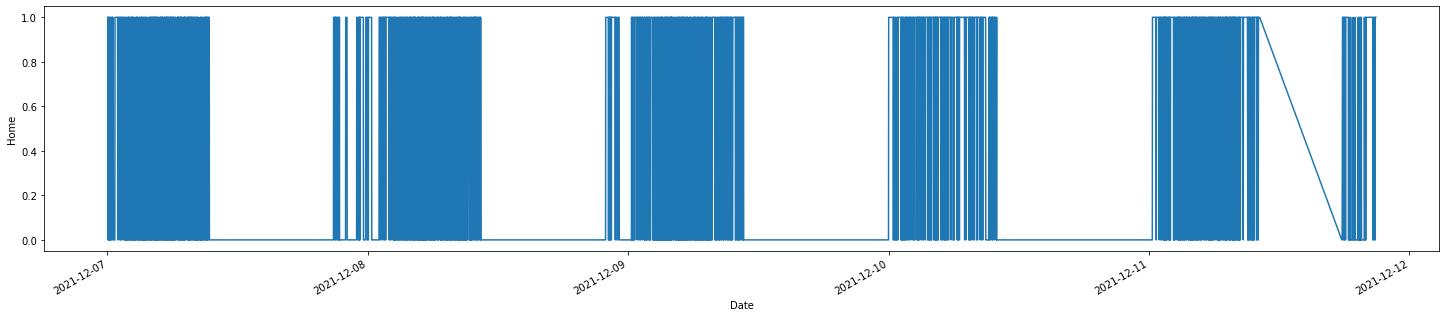

In [452]:
home = home.astype(float)
home['Home State'].plot(figsize=(25,5)).set(xlabel='Date', ylabel='Home')

<AxesSubplot:xlabel='Timestamp'>

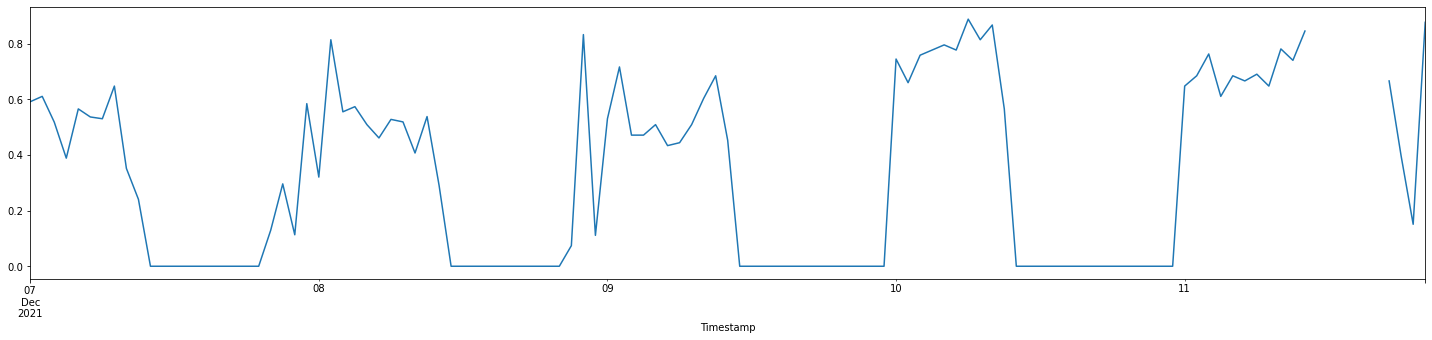

In [453]:
home['Home State'].resample(rule = 'H').mean().plot(figsize=(25,5))

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'How Home')]

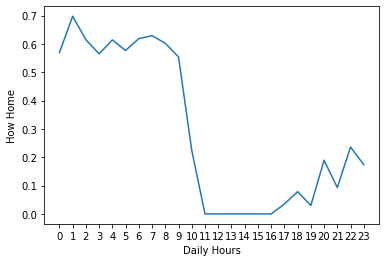

In [454]:
home.groupby(home.index.hour).mean()['Home State'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='How Home')

In [455]:
import datetime
index_date = pd.date_range('2021-12-7', '2021-12-10')
index_date = pd.Series(index_date)
index_time = pd.date_range('03:00', '07:00', freq='min')
index_time = pd.Series(index_time.time)

index = index_date.apply(
    lambda d: index_time.apply(
        lambda t: datetime.datetime.combine(d, t)
        )
    ).unstack().sort_values().reset_index(drop=True)

home_evening = home.reindex(index=index)

home_evening.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 964 entries, 2021-12-07 03:00:00 to 2021-12-10 07:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        855 non-null    float64
 1   Month       855 non-null    float64
 2   Day         855 non-null    float64
 3   Hour        855 non-null    float64
 4   Minute      855 non-null    float64
 5   Home State  855 non-null    float64
dtypes: float64(6)
memory usage: 52.7 KB


In [449]:
home_evening = home_evening.dropna()
home_evening.tail()


,Year,Month,Day,Hour,Minute,Home State
2021-12-10 06:56:00,2021,12,10,6,56,1
2021-12-10 06:57:00,2021,12,10,6,57,1
2021-12-10 06:58:00,2021,12,10,6,58,1
2021-12-10 06:59:00,2021,12,10,6,59,1
2021-12-10 07:00:00,2021,12,10,7,0,1


[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'How Home')]

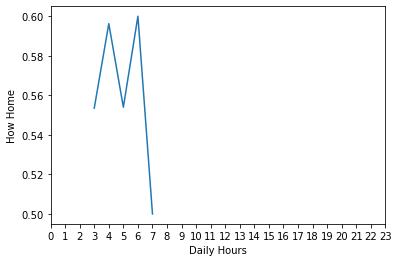

In [456]:
home_evening.groupby(home_evening.index.hour).mean()['Home State'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='How Home')

In [465]:
#find maximum number of consequative 0
df = home_evening

df['counter'] = df['Home State'].diff().ne(0).cumsum()
df2 = df.groupby('counter')['Home State'].min().to_frame(name='value').join(
df.groupby('counter')['Home State'].count().rename('number'))
max_consec0 = df2[df2['value']==0]['number'].tolist()
max_consec1 = df2[df2['value']==1]['number'].tolist()


print(max(max_consec0))

8


In [444]:
home_evening.head()

,Year,Month,Day,Hour,Minute,Home State,counter
2021-12-07 03:00:00,2021.0,12.0,7.0,3.0,0.0,0.0,1
2021-12-07 03:02:00,2021.0,12.0,7.0,3.0,1.0,0.0,1
2021-12-07 03:03:00,2021.0,12.0,7.0,3.0,3.0,0.0,1
2021-12-07 03:04:00,2021.0,12.0,7.0,3.0,4.0,0.0,1
2021-12-07 03:05:00,2021.0,12.0,7.0,3.0,5.0,1.0,2
